### **Mestrado Profisional PROFICAM - ITV**

## **Introdução a Visão Computacional**

### Aula 04 - **Homework 02**  - Segmentação, Features

Documentação extra do OpenCV pode ser visualizada em: https://docs.opencv.org/master/d6/d00/tutorial_py_root.html

A instalação do opencv-python permite rodar os codigos relacionados ao SIFT, que são licenciados por padrão e não estão na instalação normal de OpenCV

In [1]:
import sys
if 'google.colab' in sys.modules:
    import subprocess
    subprocess.call("pip install -U opencv-python".split())

Importar as bibliotecas e dependencias necessarias

In [2]:
# import para melhorar a compatibilidade entre python2 e python3 
    
from __future__ import print_function

In [3]:
# Imports necessários

from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import imutils
import math

import cv2
#from google.colab.patches import cv2_imshow
%matplotlib inline

In [4]:
print("OpenCV version:", cv2.__version__)

OpenCV version: 4.5.3


Inicialmente precisamos clonar o repositorio com as imagens que vamos usar para os experimentos

In [5]:
# Baixar os arquivos necessários para a aula
!rm -rf intro_cv_proficam
!git clone https://github.com/h3ct0r/intro_cv_proficam
!cp -r intro_cv_proficam/img img

Cloning into 'intro_cv_proficam'...
remote: Enumerating objects: 69, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 69 (delta 9), reused 65 (delta 8), pack-reused 0
Unpacking objects: 100% (69/69), done.


### Definição do desafio: encontrar o objeto (caixa de som de madeira) na imagem

Neste desafio o objetivo é demarcar/encontrar a caixa de som de madeira do poderoso chefão, num escritorio bagunçado. Como vimos na aula, os descritores e pontos de interesse, usados para fazer imagens panorámicas em alguns dos exemplos, podem também ser usados para saber onde se encontra um objeto referência na imagem.

Os passos seriam os seguintes: extrair os features da imagem query (que nesse caso seria a caixa) e do ambiente, fazer um matching dos descritores desses pontos de interesse e filtrar eles por uma métrica de qualidade (distância). Após ter os bons features seleccionados, é necessario estimar a matriz de homografia que descreve as tranformações do objeto encontrado com o objeto referência. Finalmente com essas informações da para fazer um plot da imagem localizando a caixa e das features correspondentes entre as duas imagens!

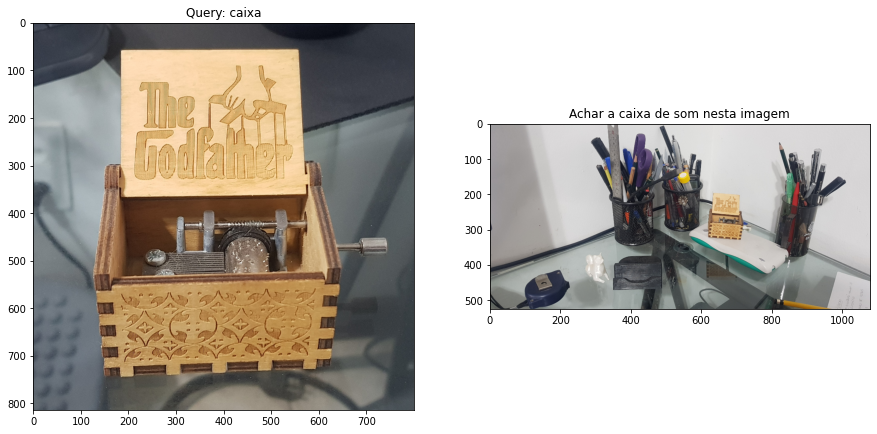

In [13]:
# carrega as imagens
img1_rgb = cv2.imread('img/box.jpg')          # queryImage
img2_rgb = cv2.imread('img/box_in_table.jpg') # trainImage

# converter pra RGB
img1_rgb = cv2.cvtColor(img1_rgb, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2_rgb, cv2.COLOR_BGR2RGB)

# converter para escala de cinza
img1 = cv2.cvtColor(img1_rgb, cv2.COLOR_RGB2GRAY)
img2 = cv2.cvtColor(img2_rgb, cv2.COLOR_RGB2GRAY)

# plotar
(fig, (ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 15))

ax1.title.set_text('Query: caixa')
ax1.imshow(img1_rgb)

ax2.title.set_text('Achar a caixa de som nesta imagem')
ax2.imshow(img2_rgb)

### Extração de features

Neste bloco é realizado a extração das features, e feito o casamento destas features usando um matcher de "força bruta". Logo os features são classificados pela distancia entre eles, quando essa razão é menor a um limiar (0.5) é considerado como uma boa feature.

In [8]:
# Inicializar o extrator de features

### Colocar o seu codigo aqui
### Dica, pode usar thresolding
feature_extractor = ??

# extrair os pontos de interesse e descrever eles
kp1, des1 = ??
kp2, des2 = ??

### Dica, usar um dos matchers que foram mostrados na aula
matches = ??

# Apply ratio test
good_match = []
for match in matches:
    if len(match) != 2:
        continue

    m, n = match
    ratio = m.distance / n.distance
    if ratio < ???:
        good_match.append(m)
        
print("Foram encontrados {} bons matches".format(len(good_match)))

Foram encontrados 11 bons matches


Vamos ver como foram esses features e quais foram as melhores features:

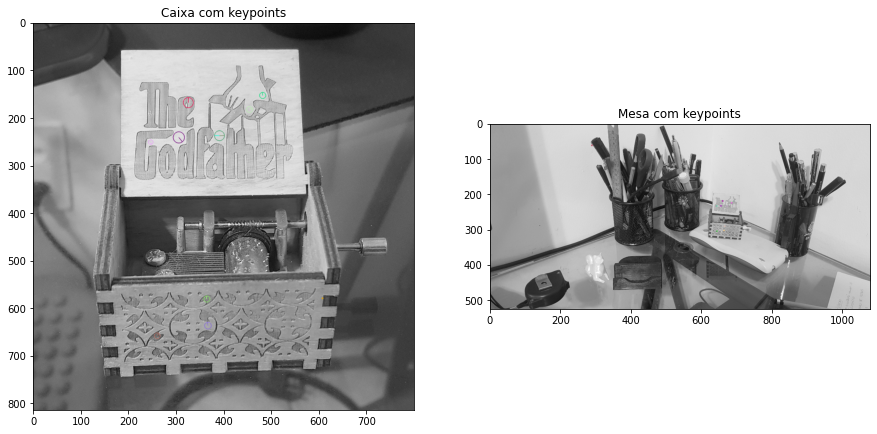

In [9]:
# filtrar so as melhores features para plotar

good_kp1 = []
for m in good_match:
    good_kp1.append(kp1[m.queryIdx])

good_kp2 = []
for m in good_match:
    good_kp2.append(kp2[m.trainIdx])

rgb_1_keypoints = cv2.drawKeypoints(cv2.cvtColor(img1, cv2.COLOR_GRAY2RGB), good_kp1, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
rgb_2_keypoints = cv2.drawKeypoints(cv2.cvtColor(img2, cv2.COLOR_GRAY2RGB), good_kp2, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

(fig, (ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 15))

ax1.title.set_text('Caixa com keypoints')
ax1.imshow(rgb_1_keypoints)

ax2.title.set_text('Mesa com keypoints')
ax2.imshow(rgb_2_keypoints)

Se tiver os matchs suficientes, estimar a matriz de homografia entre a imagem original e os pontos correspondentes na imagem destino, logo é aplicado a transformação da imagem seguindo a homografia e é desenhado a borda desta imagem transformada para visualizacao

In [10]:
MIN_MATCH_COUNT = 10
img2_rgb_output = img2_rgb.copy()

if len(good_match) > MIN_MATCH_COUNT:
    src_pts = np.float32([kp1[m.queryIdx].pt for m in good_match]).reshape(-1,1,2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_match]).reshape(-1,1,2)

    ### Colocar o seu codigo aqui
    ### Dica, encontrar a homografia
    M, mask = ??
    
    ### mascara para só mostrar os matches bons
    matchesMask = ??
    h, w = img1.shape
    
    ### encontrar os pontos que descrevem onde esta o objeto
    dst = ???

    ### desenhar onde esta o objeto na imagem
    img2_rgb_output = ???
else:
    print( "Not enough matches are found - {}/{}".format(len(good_match), MIN_MATCH_COUNT) )
    matchesMask = None

Finalmente são desenhadas todos os features extraidos, e as correspondências (em verde), junto com as duas imagens

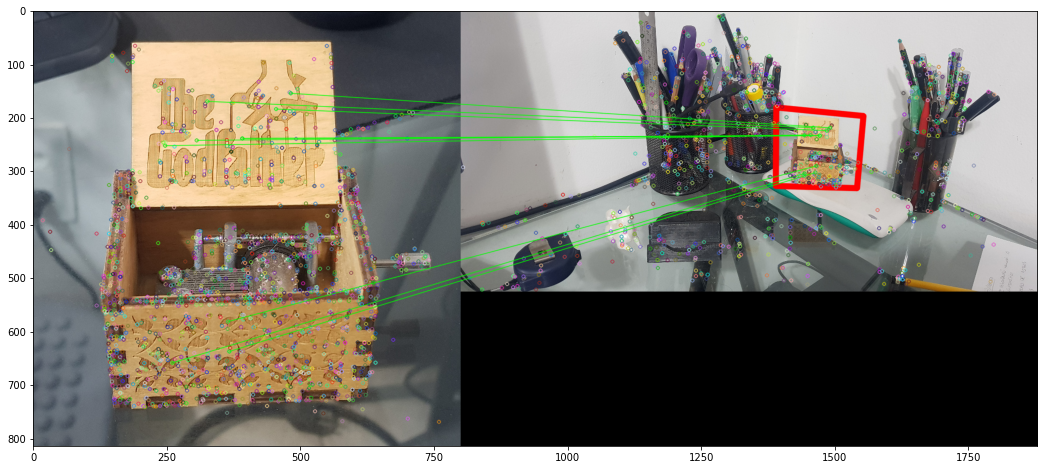

In [12]:
# Flags:
# DEFAULT = 0,
# DRAW_OVER_OUTIMG = 1,
# NOT_DRAW_SINGLE_POINTS = 2,
# DRAW_RICH_KEYPOINTS = 4
draw_params = dict(matchColor = (0,255,0), # mostrar os pares em verde
                   singlePointColor = None,
                   matchesMask = matchesMask, # desenhar somente os inliers da imagem
                   flags = 0)

img3 = cv2.drawMatches(img1_rgb, kp1, img2_rgb_output, kp2, good_match, None, **draw_params)

plt.figure(figsize=(18, 10))
plt.imshow(img3)
plt.show()
